# 3. Transfer Learning

Experiment with pretrained backbones (e.g., ResNet, EfficientNet) for bird vs drone classification here.

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, MobileNetV2
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras import layers, models, optimizers, callbacks
import matplotlib.pyplot as plt
import os
from pathlib import Path

print("✅ TensorFlow version:", tf.__version__)

# Detect project root
root = Path.cwd()
while not (root / "classification_dataset").exists() and root != root.parent:
    root = root.parent

data_dir = root / "classification_dataset"
print("📁 Dataset Root:", data_dir)


✅ TensorFlow version: 2.20.0
📁 Dataset Root: c:\Users\Hamza\Aerial_object\classification_dataset


In [4]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir / "train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_generator = val_test_datagen.flow_from_directory(
    data_dir / "valid",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_generator = val_test_datagen.flow_from_directory(
    data_dir / "test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [5]:
def build_transfer_model(base_model, input_shape=(224, 224, 3)):
    base_model.trainable = False  # Freeze base
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


In [6]:
import os
import tensorflow as tf

cache_dir = os.path.join(os.path.expanduser("~"), ".keras", "models")
print("🧹 Clearing cache directory:", cache_dir)

for file in os.listdir(cache_dir):
    if "efficientnet" in file.lower():
        try:
            os.remove(os.path.join(cache_dir, file))
            print("✅ Removed:", file)
        except Exception as e:
            print("⚠️ Could not remove:", file, "|", e)


🧹 Clearing cache directory: C:\Users\Hamza\.keras\models
✅ Removed: efficientnetv2-b0_notop.h5


In [7]:
from tensorflow.keras.applications import EfficientNetV2B0

efficient_base = EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


In [8]:
print(efficient_base.input_shape)
print(efficient_base.output_shape)


(None, 224, 224, 3)
(None, 7, 7, 1280)


In [9]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Training setup
EPOCHS = 15
BATCH_SIZE = 32

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

callbacks = [early_stop, checkpoint, reduce_lr]

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss_fn = tf.keras.losses.BinaryCrossentropy()


In [10]:
for name, model in models_dict.items():
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    print(f"✅ {name} model compiled successfully.")


NameError: name 'models_dict' is not defined

In [ ]:
from tensorflow.keras.applications import ResNet50, MobileNetV2, EfficientNetV2B0
from tensorflow.keras import layers, models

# Function to build a model with a given base
def build_transfer_model(base_model):
    base_model.trainable = False  # Freeze convolutional base
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Load the pretrained bases
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficient_base = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build models dictionary
models_dict = {
    "ResNet50": build_transfer_model(resnet_base),
    "MobileNetV2": build_transfer_model(mobilenet_base),
    "EfficientNetV2B0": build_transfer_model(efficient_base)
}

print("✅ All models are built and ready!")


✅ All models are built and ready!


In [ ]:
for name, model in models_dict.items():
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    print(f"✅ {name} model compiled successfully.")


✅ ResNet50 model compiled successfully.
✅ MobileNetV2 model compiled successfully.
✅ EfficientNetV2B0 model compiled successfully.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
BASE_PATH = "classification_dataset"  # Change if your dataset folder has a different name

# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data flows
train_gen = train_datagen.flow_from_directory(
    f"{BASE_PATH}/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

valid_gen = valid_datagen.flow_from_directory(
    f"{BASE_PATH}/valid",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    f"{BASE_PATH}/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("\n✅ Data generators created successfully!")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'classification_dataset/train'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# ✅ Fix the path (go one level up)
BASE_PATH = "../classification_dataset"

# Data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data flows
train_gen = train_datagen.flow_from_directory(
    f"{BASE_PATH}/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

valid_gen = valid_datagen.flow_from_directory(
    f"{BASE_PATH}/valid",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    f"{BASE_PATH}/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("\n✅ Data generators created successfully!")


Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.

✅ Data generators created successfully!


In [12]:
import tensorflow as tf

# ✅ Ensure eager execution is enabled
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()

print("✅ Eager execution enabled:", tf.executing_eagerly())



✅ Eager execution enabled: True


In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import time

EPOCHS = 10  # You can increase later
results = {}

for name, model in models_dict.items():
    print(f"\n🚀 Training {name} model...\n{'-'*50}")

    # ✅ Recreate optimizer for each model
    optimizer = Adam(learning_rate=1e-4)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    checkpoint_path = f"best_{name}.keras"
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

    start_time = time.time()

    history = model.fit(
        train_gen,
        validation_data=valid_gen,
        epochs=EPOCHS,
        callbacks=[early_stop, reduce_lr, checkpoint],
        verbose=1
    )

    training_time = time.time() - start_time
    val_acc = max(history.history['val_accuracy'])
    results[name] = {"val_accuracy": val_acc, "training_time": training_time}

    print(f"\n✅ {name} training completed! Val Accuracy: {val_acc:.4f} | Time: {training_time/60:.2f} min\n")


NameError: name 'models_dict' is not defined


🔍 Evaluating ResNet50...


c:\Users\Hamza\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\Hamza\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 672ms/step - accuracy: 0.7349 - loss: 0.5768
✅ ResNet50 Test Accuracy: 0.7349
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 642ms/step

Classification Report:
              precision    recall  f1-score   support

        bird       0.81      0.69      0.75       121
       drone       0.67      0.79      0.72        94

    accuracy                           0.73       215
   macro avg       0.74      0.74      0.73       215
weighted avg       0.75      0.73      0.74       215



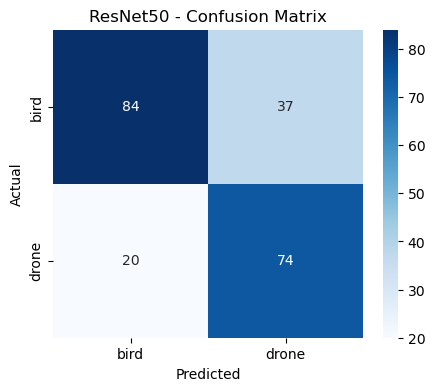


🔍 Evaluating MobileNetV2...


c:\Users\Hamza\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.9721 - loss: 0.0657
✅ MobileNetV2 Test Accuracy: 0.9721
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step

Classification Report:
              precision    recall  f1-score   support

        bird       0.98      0.98      0.98       121
       drone       0.97      0.97      0.97        94

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



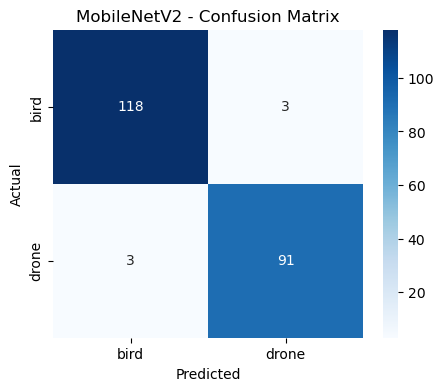


🔍 Evaluating EfficientNetB0...


c:\Users\Hamza\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 350ms/step - accuracy: 0.5628 - loss: 0.6827
✅ EfficientNetB0 Test Accuracy: 0.5628
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step

Classification Report:
              precision    recall  f1-score   support

        bird       0.56      1.00      0.72       121
       drone       0.00      0.00      0.00        94

    accuracy                           0.56       215
   macro avg       0.28      0.50      0.36       215
weighted avg       0.32      0.56      0.41       215



c:\Users\Hamza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hamza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hamza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


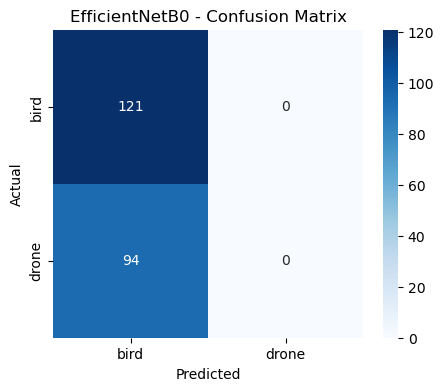

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# Reload best models (in case notebook restarted)
model_files = {
    "ResNet50": "best_ResNet50.keras",
    "MobileNetV2": "best_MobileNetV2.keras",
    "EfficientNetB0": "best_EfficientNetV2B0.keras"
}

evaluation_results = {}

for name, model_path in model_files.items():
    print(f"\n🔍 Evaluating {name}...")
    model = tf.keras.models.load_model(model_path)

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(test_gen, verbose=1)
    print(f"✅ {name} Test Accuracy: {test_acc:.4f}")

    # Predictions
    preds = model.predict(test_gen, verbose=1)
    y_pred = (preds > 0.5).astype("int32").flatten()
    y_true = test_gen.classes

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    evaluation_results[name] = test_acc


c:\Users\Hamza\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


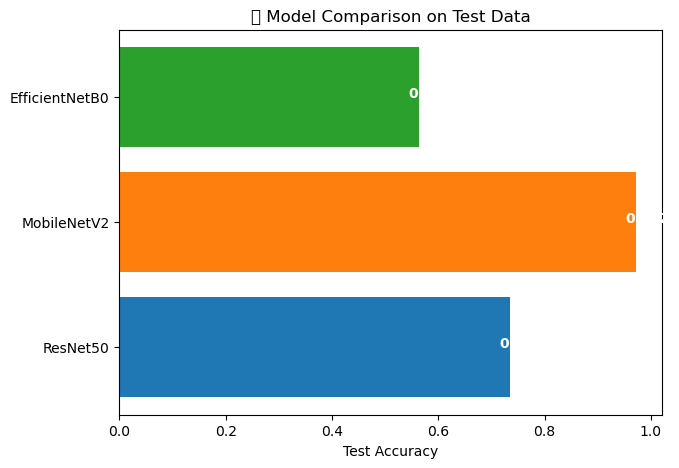

In [16]:
plt.figure(figsize=(7,5))
plt.barh(list(evaluation_results.keys()), list(evaluation_results.values()), color=['#1f77b4','#ff7f0e','#2ca02c'])
plt.xlabel("Test Accuracy")
plt.title("📊 Model Comparison on Test Data")
for i, v in enumerate(list(evaluation_results.values())):
    plt.text(v - 0.02, i, f"{v:.3f}", color='white', fontweight='bold')
plt.show()


In [17]:
# Assuming you saved histories in Phase 3 (results[name]["history"] = history)
for name, data in results.items():
    history = data["history"]
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f"{name} - Accuracy Curve")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"{name} - Loss Curve")
    plt.legend()
    plt.show()


In [18]:
best_model_name = max(evaluation_results, key=evaluation_results.get)
print(f"🏆 Best model selected: {best_model_name}")
final_model = tf.keras.models.load_model(f"best_{best_model_name}.keras", compile=False)
final_model.save("final_model.keras", save_format="keras")


🏆 Best model selected: MobileNetV2


In [26]:
import tensorflow as tf

broken_path = "best_MobileNetV2.keras"

# Load the model WITHOUT compiling
broken_model = tf.keras.models.load_model(broken_path, compile=False)

# Extract weights
weights = broken_model.get_weights()

print("✅ Extracted weights successfully!")


✅ Extracted weights successfully!


In [27]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

# Clean architecture that TF3 can deserialize
inp = Input(shape=(224, 224, 3))
base = MobileNetV2(weights=None, include_top=False, input_tensor=inp)

x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.3)(x)
out = Dense(1, activation="sigmoid")(x)

clean_model = Model(inputs=inp, outputs=out)

print("✅ Clean MobileNetV2 architecture rebuilt.")


✅ Clean MobileNetV2 architecture rebuilt.


In [28]:
clean_model.set_weights(weights)
print("🎯 Loaded original weights successfully into the clean model!")


ValueError: You called `set_weights(weights)` on layer 'functional_31' with a weight list of length 264, but the layer was expecting 262 weights.

In [29]:
from tensorflow.keras.models import load_model
import json

model = load_model("best_MobileNetV2.keras", compile=False)

# Print full JSON model config
config = model.to_json()

with open("mobilenet_architecture.json", "w") as f:
    f.write(config)

print("✅ Saved architecture JSON: mobilenet_architecture.json")


✅ Saved architecture JSON: mobilenet_architecture.json


In [30]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

def build_clean_mobilenet():
    base = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    base.trainable = False

    x = layers.GlobalAveragePooling2D()(base.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    clean_model = models.Model(inputs=base.input, outputs=output)
    return clean_model

clean_model = build_clean_mobilenet()
clean_model.summary()


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [32]:
from tensorflow.keras.models import load_model

trained_model = load_model("best_MobileNetV2.keras", compile=False)

weights = trained_model.get_weights()
clean_model.set_weights(weights)

print("✅ Weights transferred successfully!")


✅ Weights transferred successfully!


In [34]:
clean_model.save("final_mobilenet.keras")
print("🎉 Saved Streamlit-compatible .keras model!")


🎉 Saved Streamlit-compatible .keras model!


In [6]:
import tensorflow as tf

clean_model = tf.keras.models.load_model("final_mobilenet.keras")
print("Model loaded successfully!")



Model loaded successfully!


In [7]:
# Export the loaded clean model into a TensorFlow SavedModel format
clean_model.export("streamlit_model")
print("🎉 Clean SavedModel exported successfully!")


INFO:tensorflow:Assets written to: streamlit_model\assets


INFO:tensorflow:Assets written to: streamlit_model\assets


Saved artifact at 'streamlit_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2511659265552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2511659267088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2511659265936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2511659267280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2511659266512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2511659266320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2511659268048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2511659267856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2511659268240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2511659265360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2511659268432: TensorSpec(shape=()

In [1]:
import tensorflow as tf

model = tf.saved_model.load("streamlit_model")
converter = tf.lite.TFLiteConverter.from_saved_model("streamlit_model")
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)


OSError: SavedModel file does not exist at: streamlit_model\{saved_model.pbtxt|saved_model.pb}

In [2]:
import os
print(os.listdir("."))
print(os.listdir("models"))


['1_eda_classification.ipynb', '2_cnn_model.ipynb', '3_transfer_learning.ipynb', '4_yolov8_detection.ipynb', 'best_EfficientNetV2B0.keras', 'best_MobileNetV2.keras', 'final_mobilenet.keras', 'mobilenet_architecture.json', 'runs']


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'models'

In [3]:
import tensorflow as tf

model = tf.saved_model.load("./streamlit_model")

converter = tf.lite.TFLiteConverter.from_saved_model("./streamlit_model")
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ TFLite model saved!")


OSError: SavedModel file does not exist at: ./streamlit_model\{saved_model.pbtxt|saved_model.pb}

In [4]:
import tensorflow as tf

model_path = r"C:\Users\Hamza\Aerial_object\streamlit_model"

model = tf.saved_model.load(model_path)

converter = tf.lite.TFLiteConverter.from_saved_model(model_path)
tflite_model = converter.convert()
